In [2]:
from statsmodels.stats.weightstats import ztest as ztest
from scipy import stats
import numpy as np
from scipy.stats import t
import seaborn as sns


# 单样本均值的Z检验

$$Z= \frac{(\bar{X}- \mu _{\bar{x}})}{\sigma _{\bar{x}}}= \frac{(\bar{X}- \mu)}{\frac{\sigma}{\sqrt{n}}}$$

其中，$\sigma _{\bar{x}} = \frac{\sigma}{\sqrt{n}}$为标准误（standard error）

## 例题


**某工厂想确认其生产的辣条平均重量为30g.假如所有辣条的重量服从正态分布，且标准差为0.8.现抽检100包辣条，测得平均值为 29.84g.**

In [18]:
alpha = 0.05
sample_n = 100
sample_mean = 29.84
test_mean = 30
population_std = 0.8

In [21]:
# 5% 显著性水平下正态分布的临界值（双侧检验）
limit_1 = -1.96
limit_2 = 1.96

In [19]:
# 计算检验统计量Z值
z = (sample_mean - test_mean)/(population_std/np.sqrt(sample_n))
z

-2.0000000000000018

结论：因为z = -2 < -1.96，所以拒绝零假设

# 单样本均值的t检验

$$t = \frac { \bar { X } - \mu } { \frac { S } { \sqrt { n } } }$$

其中，$\frac { S } { \sqrt { n }} $为估计标准误

# t分布图

In [8]:
# 生成样本量为10000服从t分布的数值
x_1 = t.rvs(df=5, size=10000) #自由度为5
x_2 = t.rvs(df=13, size=10000) #自由度为13

<AxesSubplot: ylabel='Density'>

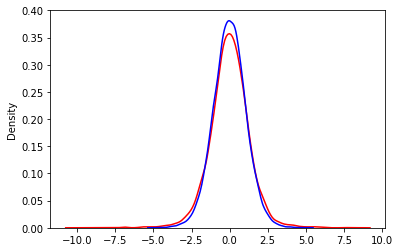

In [10]:
sns.kdeplot(x_1,color="red")#核密度图
sns.kdeplot(x_2,color="blue")

## 例题：

**据说南方学院的学生在“双十一”当天平均的花费为168元。为检验该说法，我们进行了随机抽样，获取了25位同学的样本，计算 得出平均值 $\bar{X}$ = 172.5和标准差 S = 15.4. 在α = 0.05 的水平下检验该假设。**

In [28]:
consume_sample_mean = 172.5
consume_sample_std = 15.4
consume_test_mean = 168
consume_sample_n =25

In [34]:
# 计算t值
t = (consume_sample_mean - consume_test_mean)/(consume_sample_std / np.sqrt(consume_sample_n))
t

1.461038961038961

In [32]:
# 找出临界值
limit = stats.t.ppf(alpha/2, df = consume_sample_n -1)
limit

-2.063898561628021

## 习题


**随机地抽取了某年级36位学生的分数，得知其均值$\bar{X}$=65，标准差S=12，假定有一主张说总体（该年级）均值只有60分。那么能否根据样本数据推翻该主张？**

In [35]:
grade_sample_mean = 172.5
grade_sample_std = 15.4
grade_test_mean = 168
grade_sample_n =25
# 计算t值
t = (grade_sample_mean - grade_test_mean)/(grade_sample_std / np.sqrt(grade_sample_n))
t

1.461038961038961

In [36]:
# 找出临界值
grade_limit = stats.t.ppf(alpha/2, df = grade_sample_n -1)
grade_limit

-2.063898561628021

结论：因为检验统计量t在临界值[-2.06,2.06]中，所以不能拒绝原假设，即不能推翻年级平均分为60分的假定。

## 习题 


**从1-100这100个数中随机抽取出10个数字出来作为样本，做单样 本t检验的假设检验，检验μ是否与50显著不同（α=0.05）。**

In [38]:
mylist = list(range(1, 101))

In [39]:
mysample = np.random.choice(mylist, size =10, replace = True)
mysample

array([82, 66, 82, 37, 79, 16, 27, 79, 37, 49])

In [41]:
stats.ttest_1samp(mysample, popmean = 50)# ttest_1samp:单样本t检验方法

Ttest_1sampResult(statistic=0.6774507830937017, pvalue=0.515155199475317)